<h3><B>conda environment:</b> pertpy_deg_env, python v3.11.11

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from filter_adata import adata_filtered, adata_hightumour, adata_peritumour

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

from pathlib import Path
home_path = '/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data'
home_path = Path(home_path)
DEG_path = home_path / f'DEG_figures'
DEG_path.mkdir(parents=True, exist_ok=True)
DEG_path = Path(DEG_path)

sns.set_theme(context='paper', style='ticks',font='sans-serif')

adata and clinical merged, rename the columns if you want
clusters are now annotated with specific and broad cell types
low quality cores with <1000 total cells or <100 melanoma cells have been removed
adata_filtered (both high tumour and peritumour cores) has been created
adata_hightumour (only high tumour cores) has been created
adata_peritumour (only peritumour cores) has been created
ready for downstream analysis, you can choose adata_filtered for global analysis and adata_peritumour/adata_hightumour for region-specific analyses


In [ ]:
# custom colourmap for R vs NR
colors = ["#fc8d62", "white", "#66c2a5"]
nodes = [0.0, 0.5, 1.0] # Anchor points in the range [0, 1]
response_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

In [ ]:
# import .csv files of gsea results from fgsea in R
ht_gsea = pd.read_csv('/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/DEG_figures/ht_fgsea.csv')
p_gsea = pd.read_csv('/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/DEG_figures/p_fgsea.csv')

In [ ]:
ht_pathways = [
    'HALLMARK_INTERFERON_GAMMA_RESPONSE',
    'HALLMARK_INTERFERON_ALPHA_RESPONSE',
    'HALLMARK_ALLOGRAFT_REJECTION',
    'HALLMARK_G2M_CHECKPOINT',
    'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
    'HALLMARK_UV_RESPONSE_DN',
    'HALLMARK_FATTY_ACID_METABOLISM',
    'HALLMARK_HYPOXIA',
    'HALLMARK_DNA_REPAIR',
    'HALLMARK_MYC_TARGETS_V2'
]

<h1><b>High-Tumour

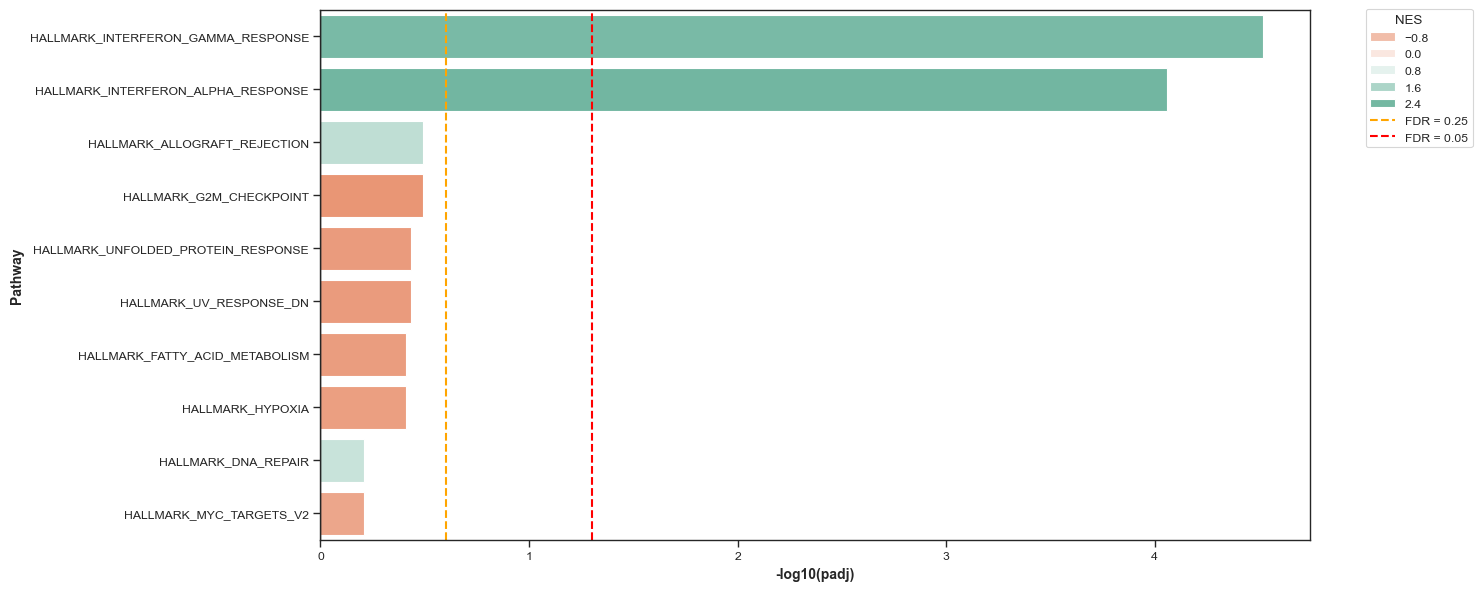

In [ ]:
# top 10 enriched pathways barplot
df = ht_gsea.copy()
df["padj"] = pd.to_numeric(df["padj"], errors="coerce")   # make sure padj column is numeric to prevent log-transform errors
df["-log10(FDR)"] = -np.log10(df["padj"])                 # add log-transformed padj column
df_top = df[df['pathway'].isin(ht_pathways)]

plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_top, 
            x="-log10(FDR)", 
            y="pathway", 
            hue="NES", 
            dodge=False, 
            palette=response_cmap)

plt.axvline(0, color="black", lw=1)
plt.axvline(x=-np.log10(0.25), color="orange", linestyle="--", linewidth=1.5, label="FDR = 0.25")
plt.axvline(x=-np.log10(0.05), color="red", linestyle="--", linewidth=1.5, label="FDR = 0.05")
ax.set_xlabel("-log10(padj)", fontsize=10, fontweight="bold")
ax.set_ylabel("Pathway", fontsize=10, fontweight="bold")

# Create the legend first
leg = plt.legend(
    bbox_to_anchor=(1.05, 1.013),
    loc="upper left"
    )
leg.set_title("NES")
leg.get_title().set_position((-10, 0))  # shift title left (adjust -10 as needed)
plt.tight_layout()
plt.savefig(DEG_path / "ht_gsea_bar.pdf", dpi=300, bbox_inches='tight')

<h1><b>Peritumour

In [ ]:
peri_pathways = [
    'HALLMARK_INTERFERON_GAMMA_RESPONSE',
    'HALLMARK_ALLOGRAFT_REJECTION',
    'HALLMARK_INTERFERON_ALPHA_RESPONSE',		
    'HALLMARK_G2M_CHECKPOINT',
    'HALLMARK_UV_RESPONSE_DN',
    'HALLMARK_COMPLEMENT',
    'HALLMARK_ANGIOGENESIS',
    'HALLMARK_E2F_TARGETS',
    'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
    'HALLMARK_IL6_JAK_STAT3_SIGNALING',
]

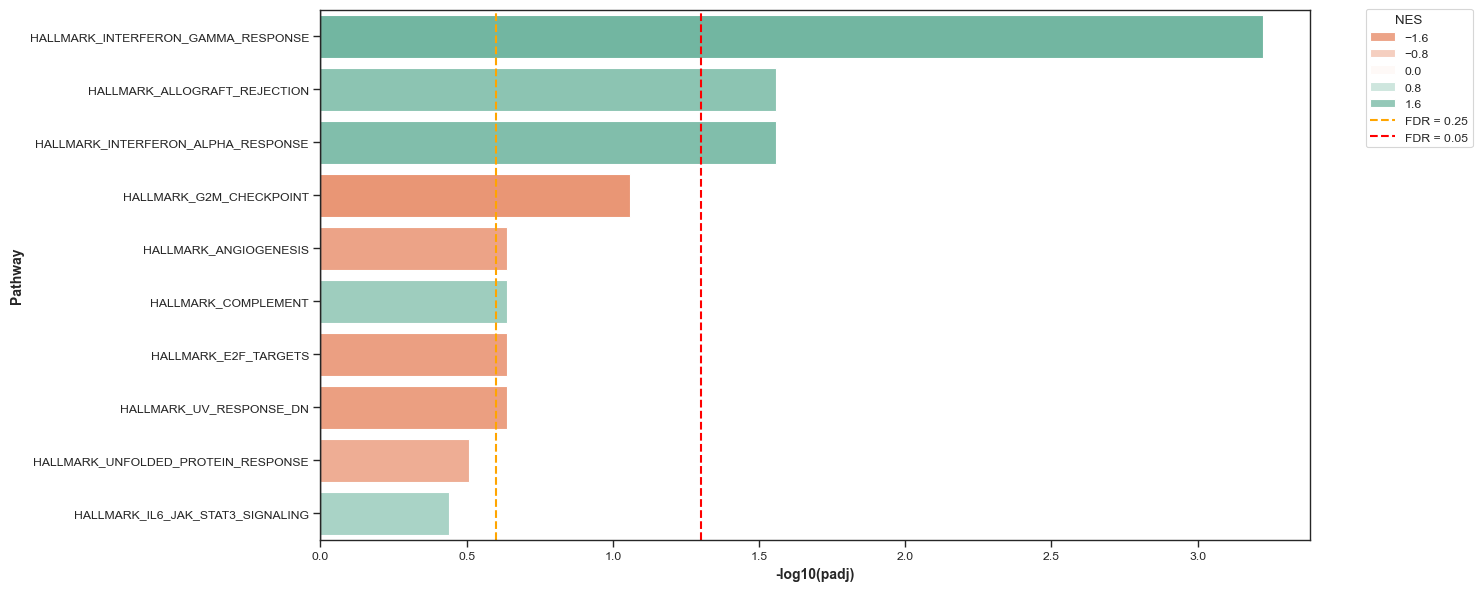

In [ ]:
# top 10 enriched pathways barplot
df = p_gsea.copy()
df["padj"] = pd.to_numeric(df["padj"], errors="coerce")   # make sure padj column is numeric to prevent log-transform errors
df["-log10(FDR)"] = -np.log10(df["padj"])                 # add log-transformed padj column
df_top = df[df['pathway'].isin(peri_pathways)]

plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_top, 
            x="-log10(FDR)", 
            y="pathway", 
            hue="NES", 
            dodge=False, 
            palette=response_cmap)

plt.axvline(0, color="black", lw=1)
plt.axvline(x=-np.log10(0.25), color="orange", linestyle="--", linewidth=1.5, label="FDR = 0.25")
plt.axvline(x=-np.log10(0.05), color="red", linestyle="--", linewidth=1.5, label="FDR = 0.05")
ax.set_xlabel("-log10(padj)", fontsize=10, fontweight="bold")
ax.set_ylabel("Pathway", fontsize=10, fontweight="bold")

leg = plt.legend(
    bbox_to_anchor=(1.05, 1.013),
    loc="upper left"
    )
leg.set_title("NES")
leg.get_title().set_position((-10, 0)) 
plt.tight_layout()
plt.savefig(DEG_path / "p_gsea_bar.pdf", dpi=300, bbox_inches='tight')